# Test Known Case

In [3]:
using PGFPlots

function _integrate_simpsons(f::Function, a::Real, b::Real, n::Int)
    # integrate using Composite Simpson's rule
    # reference: https://en.wikipedia.org/wiki/Simpson%27s_rule

    @assert(n > 0) # number of intervals
    @assert(mod(n,2) == 0) # n must be even

    h = (b-a)/n
    retval = f(a) + f(b)
    flip = true
    for i = 1 : n-1
        retval += f(a+i*h) * (flip ? 4 : 2)
        flip = !flip
    end
    return h/3*retval
end

_integrate_simpsons (generic function with 1 method)

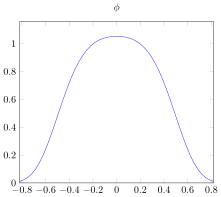

In [4]:
function Ptilde_ϕ(ϕ::Float64)
    ϕ = clamp(ϕ, -1.0, 1.0)
    f = [ϕ^2, ϕ^4]
    θ = [-1.0, -8.6]
    exp(dot(θ, f))
end

domain = (-0.82, 0.82)
Z = _integrate_simpsons(Ptilde_ϕ, domain..., 100)
p_ϕ = PGFPlots.Plots.Linear(x->Ptilde_ϕ(x)/Z, domain, style="mark=none")
Axis(p_ϕ, xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"\phi")

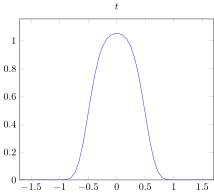

In [5]:
function Ptilde_t(t::Float64)
    t = clamp(t, -1.0, 1.0)
    f = [t^2, t^4]
    θ = [-1.0, -8.6]
    exp(dot(θ, f))
end

domain = (-1.7, 1.7)
p_t = PGFPlots.Plots.Linear(x->Ptilde_t(x)/Z, domain, style="mark=none")
Z = _integrate_simpsons(Ptilde_t, domain..., 100)
Axis(p_t, xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"t")

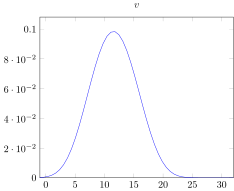

In [6]:
using Interact

w1 = -1.5
w2 = -10.0
w3 = -2.5
w4 = -10.0
# @manipulate for w1 in linspace(-10.0,10.0,41),
#                 w2 in linspace(-10.0,10.0,41),
#                 w3 in linspace(-10.0,10.0,41),
#                 w4 in linspace(-10.0,10.0,41)
    
function Ptilde_v(v::Float64)
    μ, σ = 13.0, 32.0-13.0
    v = (v - μ)/σ
    v = clamp(v, -1.0, 1.0)
    
    f = [v, v^2, v^3, v^4]
    θ = [w1, w2, w3, w4]
    exp(dot(θ, f))
end

domain = (-1.0, 32.0)

Z = _integrate_simpsons(Ptilde_v, domain..., 100)
p_v = PGFPlots.Plots.Linear(x->Ptilde_v(x)/Z, domain, style="mark=none")
Axis(p_v, xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"v")
# end

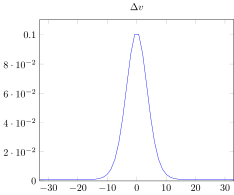

In [7]:
using Interact

w1 = -9.0
w2 =  4.5
# @manipulate for w1 in linspace(-20.0,20.0,41),
#                 w2 in linspace(-10.0,10.0,41),
#                 w3 in linspace(-10.0,10.0,41),
#                 w4 in linspace(-10.0,10.0,41)
    
    function Ptilde_dv(dv::Float64)
        μ, σ = 0.0, 15.0
        dv = (dv - μ)/σ
        dv = clamp(dv, -1.0, 1.0)

        f = [dv^2, dv^4]
        θ = [w1, w2]
        exp(dot(θ, f))
    end

    domain = (-33.0, 33.0)

    Z = _integrate_simpsons(Ptilde_dv, domain..., 100)
p_dv = PGFPlots.Plots.Linear(x->Ptilde_dv(x)/Z, domain, style="mark=none")    
Axis(p_dv, xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"\Delta v")
# end

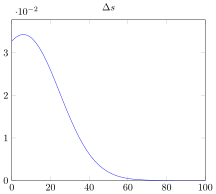

In [8]:
using Interact

w1 = -5.0
w2 = -7.5
w3 = 0.5
w4 = 2.0
# @manipulate for w1 in linspace(-20.0,20.0,41),
#                 w2 in linspace(-10.0,10.0,41),
#                 w3 in linspace(-10.0,10.0,41),
#                 w4 in linspace(-10.0,10.0,41)
    
    function Ptilde_ds(ds::Float64)
        μ, σ = 30.0, 70.0
        ds = (ds - μ)/σ
        ds = clamp(ds, -1.0, 1.0)

        f = [ds, ds^2, ds^3, ds^4]
        θ = [w1, w2, w3, w4]
        exp(dot(θ, f))
    end

    domain = (0.0, 100.0)

    Z = _integrate_simpsons(Ptilde_ds, domain..., 100)
    p_ds = PGFPlots.Plots.Linear(x->Ptilde_ds(x)/Z, domain, style="mark=none")
    Axis(p_ds, xmin=domain[1], xmax=domain[2], ymin=0.0, title=L"\Delta s")
# end

# AutoScenes Sampling

INFO: Recompiling stale cache file /home/tim/.julia/lib/v0.5/AutoScenes.ji for module AutoScenes.


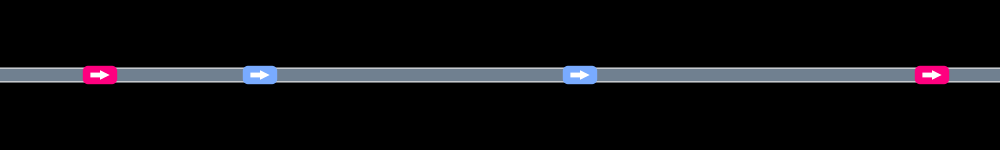

In [9]:
using AutomotiveDrivingModels
using AutoScenes
using AutoViz

scene, roadway = AutoScenes.get_start_scene_and_roadway()

car_colors = Dict{Int,Colorant}()
car_colors[2] = COLOR_CAR_EGO
car_colors[3] = COLOR_CAR_EGO
render(scene, roadway, cam=StaticCamera(VecE2(150.0,0.0), 8.0), canvas_height=150, car_colors=car_colors)

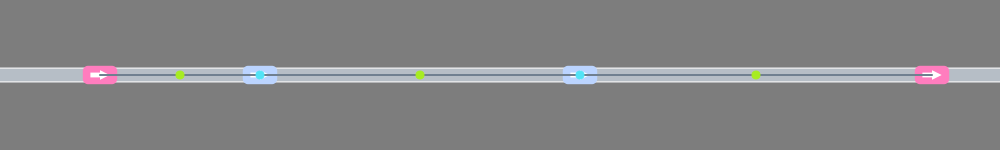

In [10]:
structure = SceneStructure([
    FactorAssignment(FeatureForms.ROAD, [2]),
    FactorAssignment(FeatureForms.ROAD, [3]),
    FactorAssignment(FeatureForms.FOLLOW, [1,2]),
    FactorAssignment(FeatureForms.FOLLOW, [2,3]),
    FactorAssignment(FeatureForms.FOLLOW, [3,4]),
    ], Set{Int}([2,3]), LeadFollowRelationships([2,3,4,0], [0,1,2,3]))
overlays = SceneOverlay[Overwash(RGBA(1.0,1.0,1.0,0.7)), SceneStructureOverlay(structure)]
render(scene, roadway, overlays, cam=StaticCamera(VecE2(150.0,0.0), 8.0), canvas_height=150, car_colors=car_colors)

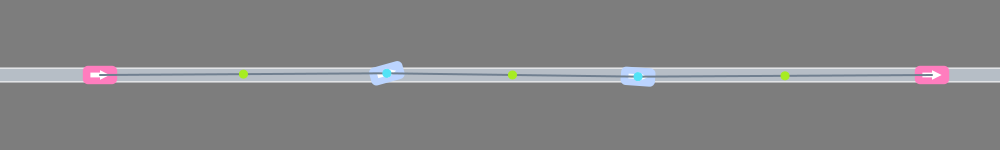

In [11]:
factors = create_shared_factors()
proposal_distribution = (Normal(0.0,10.0), Normal(0.0,1.0), Normal(0.0,2.0), Normal(0.0,0.2))
metropolis_hastings!(scene, structure, roadway, factors, proposal_distribution, 1000)
render(scene, roadway, overlays, cam=StaticCamera(VecE2(150.0,0.0), 8.0), canvas_height=150, car_colors=car_colors)

In [12]:
using DataFrames
t = Float64[]
v=Float64[]
ϕ=Float64[]
Δv=Float64[]
Δs=Float64[]

for i in 1 : 1000
    scene, roadway = AutoScenes.get_start_scene_and_roadway()
    metropolis_hastings!(scene, structure, roadway, factors, proposal_distribution, 2000)
    push!(t, scene[2].state.posF.t)
    push!(t, scene[3].state.posF.t)
    push!(v, scene[2].state.v)
    push!(v, scene[3].state.v)
    push!(ϕ, scene[2].state.posF.ϕ)
    push!(ϕ, scene[3].state.posF.ϕ)
    push!(Δs, scene[2].state.posF.s - scene[1].state.posF.s - 0.5*scene[1].def.length - 0.5*scene[2].def.length)
    push!(Δs, scene[3].state.posF.s - scene[2].state.posF.s - 0.5*scene[2].def.length - 0.5*scene[3].def.length)
    push!(Δv, scene[2].state.v - scene[1].state.v)
    push!(Δv, scene[3].state.v - scene[2].state.v)
end

"DONE"

"DONE"

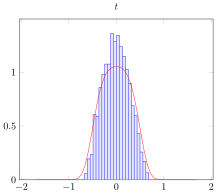

In [13]:
using PGFPlots

Axis([Plots.Histogram(t, discretization=:fd, density=true), p_t], ymin=0, title=L"t")

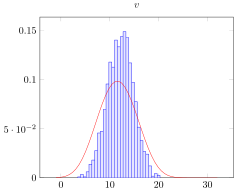

In [14]:
Axis([Plots.Histogram(v, discretization=:fd, density=true),p_v], ymin=0, title=L"v")

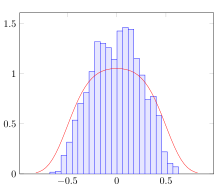

In [15]:
Axis([Plots.Histogram(ϕ, discretization=:fd, density=true), p_ϕ], ymin=0, title=L"ϕ")

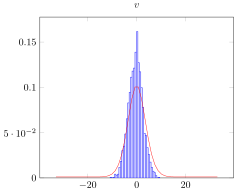

In [16]:
Axis([Plots.Histogram(Δv, discretization=:fd, density=true), p_dv], ymin=0, title=L"Δv")

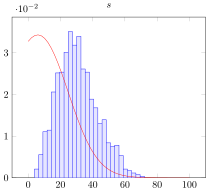

In [17]:
Axis([Plots.Histogram(Δs, discretization=:fd, density=true), p_ds], ymin=0, title=L"Δs")